In [5]:
#To figure out the trend, there are certain filters
#Filter

import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('/home/mkadam/Data Science - Marsian Class/04 ML/11 TimeSeries/Data/macrodata.csv',index_col=0, parse_dates=True)

In [9]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [10]:
df.describe(include='all')

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


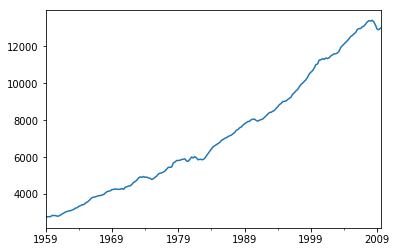

In [12]:
df['realgdp'].plot()

In [13]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [14]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600) # since it's quartely data pass lambda=1600

In [17]:
df['trend'] = gdp_trend

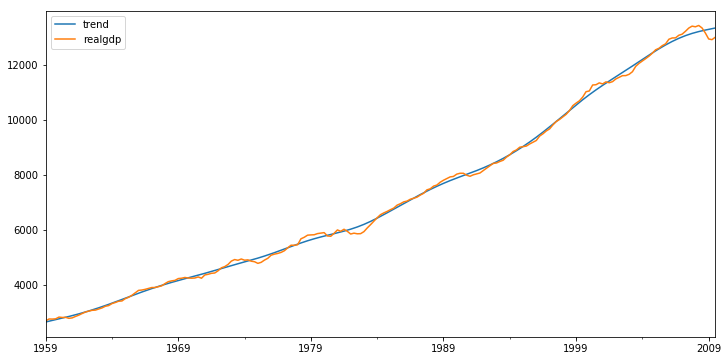

In [21]:
df[['trend','realgdp']].plot(figsize=(12,6))

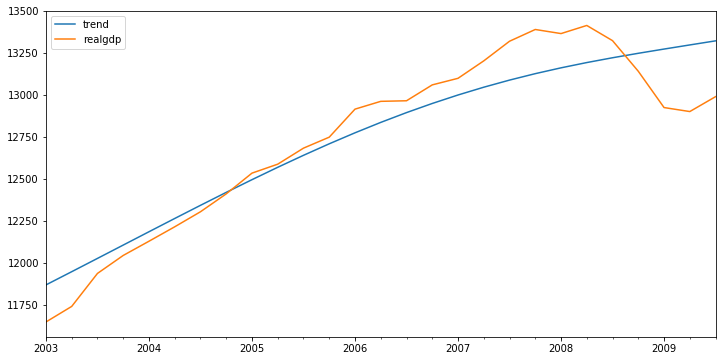

In [24]:
df[['trend','realgdp']]['2003-01-01':].plot(figsize=(12,6))

In [28]:
airlines = pd.read_csv('/home/mkadam/Data Science - Marsian Class/04 ML/11 TimeSeries/Data/airline_passengers.csv',index_col=0, parse_dates=True)

In [29]:
airlines.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


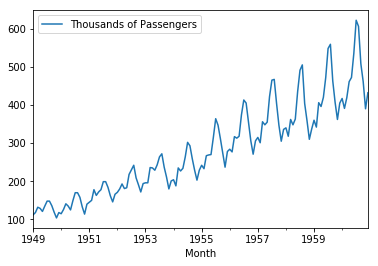

In [31]:
airlines.plot()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
result = seasonal_decompose(airlines['Thousands of Passengers'],model='additive')

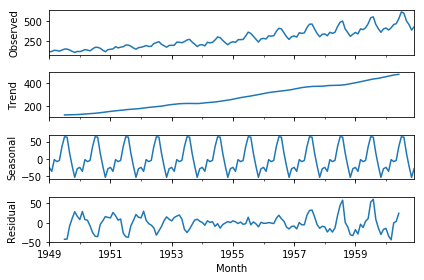

In [39]:
result.plot();

In [41]:
result1 = seasonal_decompose(airlines['Thousands of Passengers'],model='multiplicative')

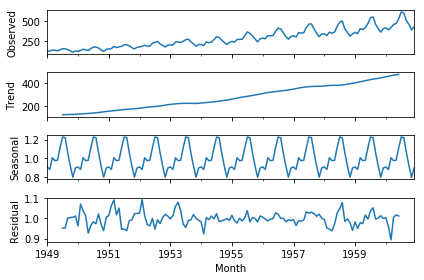

In [42]:
result1.plot();

In [43]:
#SMA - simple moving avg

airlines['6-month-SMA'] = airlines['Thousands of Passengers'].rolling(window=6).mean()
airlines['12-month-SMA'] = airlines['Thousands of Passengers'].rolling(window=12).mean()

In [45]:
airlines.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


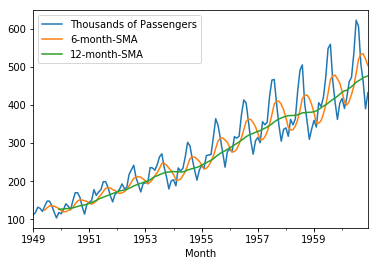

In [46]:
airlines.plot()

In [47]:
#EWMA - Exponential Weighted Moving Avg

airlines['12-month-EWMA']=airlines['Thousands of Passengers'].ewm(span=12,adjust=True).mean()

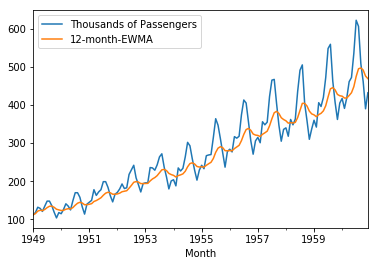

In [49]:
airlines[['Thousands of Passengers','12-month-EWMA']].plot()

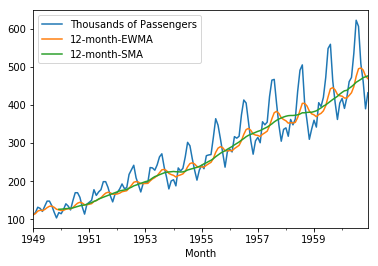

In [50]:
airlines[['Thousands of Passengers','12-month-EWMA','12-month-SMA']].plot()
#remember 12-month-EWMA  - 12 is expential parameter given as input

In [51]:
df1 = pd.read_csv('/home/mkadam/Data Science - Marsian Class/04 ML/11 TimeSeries/Data/airline_passengers.csv',index_col=0, parse_dates=True)

In [52]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [55]:
df1.index.freq = 'MS'

In [56]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [57]:
span = 12
my_alpha = 2 /(span+1)

In [58]:
#Single Exponential Smoothing
# df1['Sinlge-EWMA12']=df1['Thousands of Passengers'].ewm(alpha=my_alpha,adjust=True).mean()

# or this can be done using holt-winter package

In [59]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [61]:
model = SimpleExpSmoothing(df1['Thousands of Passengers'])

In [62]:
fitted_model = model.fit(smoothing_level=my_alpha,optimized=False)

In [63]:
fitted_model.fittedvalues

#first value repeats - it's reported bug actually

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
1949-06-01    118.359861
1949-07-01    120.919883
1949-08-01    125.086055
1949-09-01    128.611277
1949-10-01    129.748004
1949-11-01    128.094465
1949-12-01    124.387624
1950-01-01    123.404912
1950-02-01    122.111849
1950-03-01    122.710026
1950-04-01    125.523868
1950-05-01    126.981735
1950-06-01    126.676852
1950-07-01    130.111183
1950-08-01    136.247924
1950-09-01    141.440551
1950-10-01    143.988159
1950-11-01    142.297673
1950-12-01    137.944185
1951-01-01    138.260464
1951-02-01    139.297316
1951-03-01    140.943882
1951-04-01    146.644824
1951-05-01    149.161005
1951-06-01    152.674696
                 ...    
1958-07-01    366.828136
1958-08-01    385.931500
1958-09-01    404.249730
1958-10-01    404.211310
1958-11-01    397.255724
1958-12-01    383.831767
1959-01-01    376.626879
1959-02-01    374.068898
1959-03-01    369.1

In [64]:
df1['SE12'] = fitted_model.fittedvalues.shift(-1)
#values shifted up to remove bug
df1.head()

,Thousands of Passengers,SE12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [65]:
#Double Exponential smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [67]:
df1['DESadd']=ExponentialSmoothing(df1['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

#bydefault it is taking span=12 or alpha value internally

In [68]:
df1.head()

,Thousands of Passengers,SE12,DESadd
Month,,,
1949-01-01,112,112.000000,114.336476
1949-02-01,118,112.923077,120.336476
1949-03-01,132,115.857988,134.336476
1949-04-01,129,117.879836,131.336476
1949-05-01,121,118.359861,123.336476


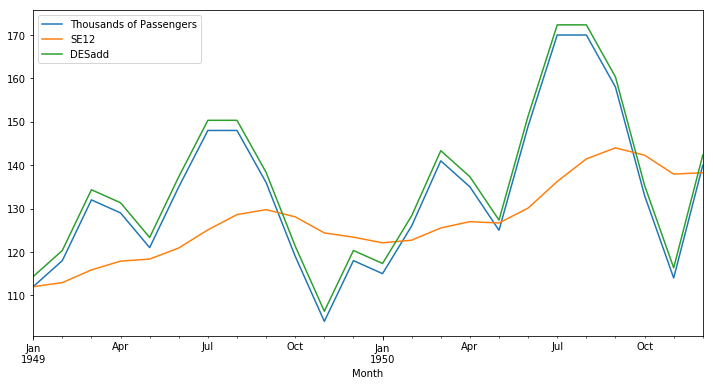

In [71]:
df1.iloc[:24].plot(figsize=(12,6))

In [72]:
df1['DESmulti']=ExponentialSmoothing(df1['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

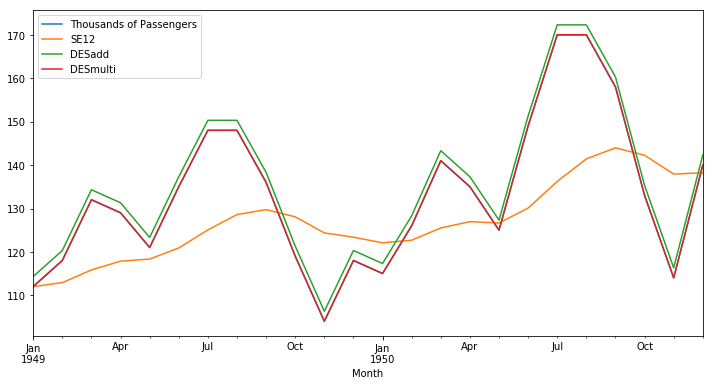

In [73]:
df1.iloc[:24].plot(figsize=(12,6))

In [74]:
#Tripple Exponential Smoothing

df1['TESadd'] = ExponentialSmoothing(df1['Thousands of Passengers'],trend='add',seasonal='add',
                                     seasonal_periods=12).fit().fittedvalues

In [75]:
df1.head()

,Thousands of Passengers,SE12,DESadd,DESmulti,TESadd
Month,,,,,
1949-01-01,112,112.000000,114.336476,112.049247,113.081265
1949-02-01,118,112.923077,120.336476,118.051885,120.550706
1949-03-01,132,115.857988,134.336476,132.058041,135.527352
1949-04-01,129,117.879836,131.336476,129.056722,133.155102
1949-05-01,121,118.359861,123.336476,121.053204,125.656174


In [76]:
#Tripple Exponential Smoothing

df1['TESmul'] = ExponentialSmoothing(df1['Thousands of Passengers'],trend='mul',seasonal='mul',
                                     seasonal_periods=12).fit().fittedvalues

In [77]:
df1.head()

,Thousands of Passengers,SE12,DESadd,DESmulti,TESadd,TESmul
Month,,,,,,
1949-01-01,112,112.000000,114.336476,112.049247,113.081265,111.578688
1949-02-01,118,112.923077,120.336476,118.051885,120.550706,118.834709
1949-03-01,132,115.857988,134.336476,132.058041,135.527352,133.348615
1949-04-01,129,117.879836,131.336476,129.056722,133.155102,127.905259
1949-05-01,121,118.359861,123.336476,121.053204,125.656174,120.987910


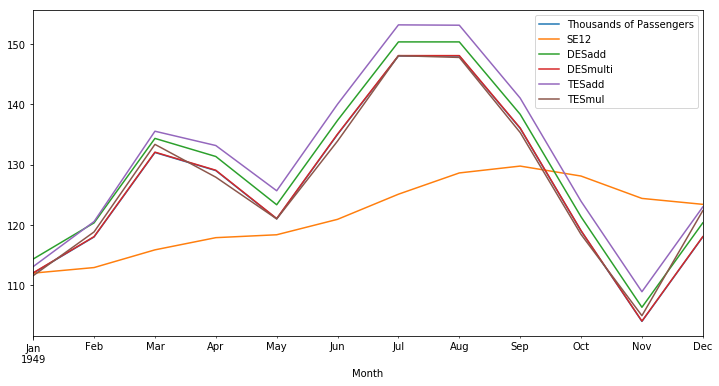

In [78]:
df1.iloc[:12].plot(figsize=(12,6))

In [ ]:
# most resemble one is doble exp smoothing line to the original one
# Basically these were meant for smoothing the residual but later 
# it evolved to predict the accurate results for future period 